## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
from keras.layers import Dropout

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
Dropout_EXP = [0.25, 0.3, 0.35, 0.4, 0.45]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for drop_ratio in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout = %.2f" % (drop_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drop_ratio)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-dropout-%s" % str(drop_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Dropout = 0.25
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (

196/196 [==============================] - 5s 24ms/step - loss: 1.6424 - accuracy: 0.4094 - val_loss: 1.5541 - val_accuracy: 0.4516
Epoch 45/50
196/196 [==============================] - 5s 24ms/step - loss: 1.6335 - accuracy: 0.4110 - val_loss: 1.5878 - val_accuracy: 0.4369
Epoch 46/50
196/196 [==============================] - 5s 25ms/step - loss: 1.6513 - accuracy: 0.4076 - val_loss: 1.5619 - val_accuracy: 0.4482
Epoch 47/50
196/196 [==============================] - 5s 25ms/step - loss: 1.6355 - accuracy: 0.4123 - val_loss: 1.5581 - val_accuracy: 0.4516
Epoch 48/50
196/196 [==============================] - 5s 25ms/step - loss: 1.6365 - accuracy: 0.4131 - val_loss: 1.5631 - val_accuracy: 0.4573
Epoch 49/50
196/196 [==============================] - 5s 25ms/step - loss: 1.6337 - accuracy: 0.4127 - val_loss: 1.5492 - val_accuracy: 0.4600
Epoch 50/50
196/196 [==============================] - 5s 24ms/step - loss: 1.6354 - accuracy: 0.4107 - val_loss: 1.5600 - val_accuracy: 0.4516
Expe

196/196 [==============================] - 5s 24ms/step - loss: 1.7937 - accuracy: 0.3414 - val_loss: 1.7602 - val_accuracy: 0.3667
Epoch 38/50
196/196 [==============================] - 5s 24ms/step - loss: 1.7979 - accuracy: 0.3396 - val_loss: 1.7281 - val_accuracy: 0.3773
Epoch 39/50
196/196 [==============================] - 5s 26ms/step - loss: 1.7918 - accuracy: 0.3439 - val_loss: 1.7169 - val_accuracy: 0.3855
Epoch 40/50
196/196 [==============================] - 5s 26ms/step - loss: 1.7892 - accuracy: 0.3426 - val_loss: 1.7197 - val_accuracy: 0.3816
Epoch 41/50
196/196 [==============================] - 5s 23ms/step - loss: 1.7842 - accuracy: 0.3471 - val_loss: 1.7420 - val_accuracy: 0.3770
Epoch 42/50
196/196 [==============================] - 5s 23ms/step - loss: 1.7899 - accuracy: 0.3460 - val_loss: 1.7456 - val_accuracy: 0.3676
Epoch 43/50
196/196 [==============================] - 5s 23ms/step - loss: 1.7791 - accuracy: 0.3499 - val_loss: 1.7293 - val_accuracy: 0.3794
Epoc

196/196 [==============================] - 5s 23ms/step - loss: 1.9680 - accuracy: 0.2480 - val_loss: 1.9509 - val_accuracy: 0.2649
Epoch 31/50
196/196 [==============================] - 5s 23ms/step - loss: 1.9607 - accuracy: 0.2525 - val_loss: 1.9921 - val_accuracy: 0.2707
Epoch 32/50
196/196 [==============================] - 5s 26ms/step - loss: 1.9602 - accuracy: 0.2508 - val_loss: 1.9270 - val_accuracy: 0.2861
Epoch 33/50
196/196 [==============================] - 5s 25ms/step - loss: 1.9600 - accuracy: 0.2487 - val_loss: 1.9369 - val_accuracy: 0.2820
Epoch 34/50
196/196 [==============================] - 6s 29ms/step - loss: 1.9563 - accuracy: 0.2508 - val_loss: 1.9245 - val_accuracy: 0.2820
Epoch 35/50
196/196 [==============================] - 5s 23ms/step - loss: 1.9586 - accuracy: 0.2498 - val_loss: 1.9814 - val_accuracy: 0.2680
Epoch 36/50
196/196 [==============================] - 5s 26ms/step - loss: 1.9527 - accuracy: 0.2531 - val_loss: 1.9629 - val_accuracy: 0.2792
Epoc

196/196 [==============================] - 5s 24ms/step - loss: 2.0278 - accuracy: 0.2216 - val_loss: 2.0089 - val_accuracy: 0.2328
Epoch 24/50
196/196 [==============================] - 5s 24ms/step - loss: 2.0282 - accuracy: 0.2230 - val_loss: 2.0316 - val_accuracy: 0.2276
Epoch 25/50
196/196 [==============================] - 4s 22ms/step - loss: 2.0280 - accuracy: 0.2235 - val_loss: 2.0468 - val_accuracy: 0.2198
Epoch 26/50
196/196 [==============================] - 5s 23ms/step - loss: 2.0259 - accuracy: 0.2204 - val_loss: 1.9983 - val_accuracy: 0.2550
Epoch 27/50
196/196 [==============================] - 5s 23ms/step - loss: 2.0212 - accuracy: 0.2257 - val_loss: 1.9809 - val_accuracy: 0.2468
Epoch 28/50
196/196 [==============================] - 5s 25ms/step - loss: 2.0241 - accuracy: 0.2251 - val_loss: 2.0191 - val_accuracy: 0.2225
Epoch 29/50
196/196 [==============================] - 5s 26ms/step - loss: 2.0106 - accuracy: 0.2276 - val_loss: 1.9946 - val_accuracy: 0.2444
Epoc

196/196 [==============================] - 4s 22ms/step - loss: 2.1158 - accuracy: 0.1736 - val_loss: 2.1650 - val_accuracy: 0.1577
Epoch 17/50
196/196 [==============================] - 4s 22ms/step - loss: 2.1117 - accuracy: 0.1739 - val_loss: 2.1513 - val_accuracy: 0.1625
Epoch 18/50
196/196 [==============================] - 4s 22ms/step - loss: 2.1185 - accuracy: 0.1735 - val_loss: 2.1450 - val_accuracy: 0.1601
Epoch 19/50
196/196 [==============================] - 4s 22ms/step - loss: 2.1153 - accuracy: 0.1754 - val_loss: 2.1416 - val_accuracy: 0.1803
Epoch 20/50
196/196 [==============================] - 5s 28ms/step - loss: 2.1123 - accuracy: 0.1758 - val_loss: 2.1273 - val_accuracy: 0.1816
Epoch 21/50
196/196 [==============================] - 5s 28ms/step - loss: 2.1117 - accuracy: 0.1760 - val_loss: 2.1622 - val_accuracy: 0.1670
Epoch 22/50
196/196 [==============================] - 5s 27ms/step - loss: 2.1079 - accuracy: 0.1780 - val_loss: 2.1520 - val_accuracy: 0.1774
Epoc

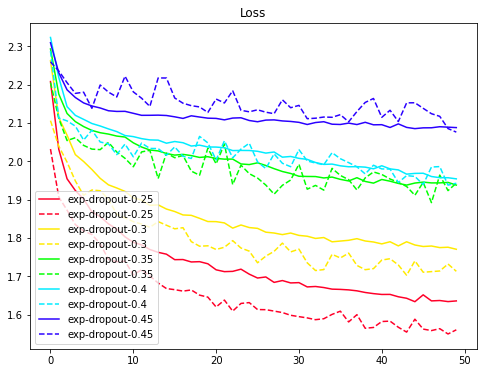

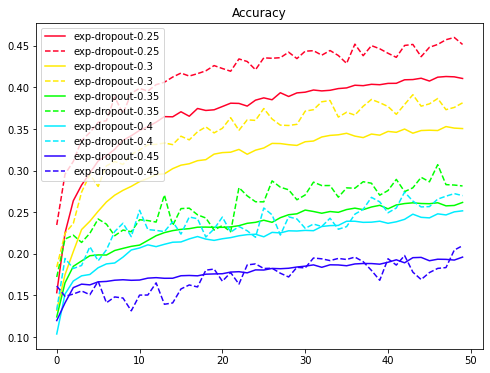

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
'''
以此例來說，dropout設較低的情況，準確率越高。
'''